# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Make the API call try to limit with rate limiter or Max function
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build query URL, rate limiter not working
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# rate_limiter = RateLimiter(max_calls=50, period=60)


response = requests.get(query_url + "New York")
city_data = response.json()
city_data


{'coord': {'lon': -74.01, 'lat': 40.71},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 69.26,
  'feels_like': 65.01,
  'temp_min': 66.99,
  'temp_max': 71.6,
  'pressure': 1005,
  'humidity': 43},
 'visibility': 10000,
 'wind': {'speed': 5.82, 'deg': 0, 'gust': 16.11},
 'clouds': {'all': 1},
 'dt': 1602114260,
 'sys': {'type': 1,
  'id': 4610,
  'country': 'US',
  'sunrise': 1602068342,
  'sunset': 1602109686},
 'timezone': -14400,
 'id': 5128581,
 'name': 'New York',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | guane
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | porto novo
Processing Record 7 of Set 1 | sitka
Processing Record 8 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 9 of Set 1 | krabi
Processing Record 10 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 11 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 12 of Set 1 | llangefni
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | san policarpo
Processing Record 18 of Set 1 | newport
Processing Record 19 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 20 of Set 1 | ushuaia
Proc

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.59,26.89,64.31,86,0,9.62,ZA,1602113997
1,rikitea,-23.12,-134.97,73.92,79,100,7.47,PF,1602114260
2,guane,22.20,-84.09,80.42,78,69,9.42,CU,1602114260
3,cape town,-33.93,18.42,59.00,87,17,10.29,ZA,1602114260
4,mataura,-46.19,168.86,46.99,60,85,8.01,NZ,1602114260


In [6]:
#  Get the indices of cities that have humidity over 100%.

humidity_max = city_data_df["Humidity"].max()
humidity_max

100

In [7]:
#  Get the indices of cities that have humidity over 100%.
city_data_df[city_data_df.Humidity > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = city_data_df[city_data_df.Humidity < 100]
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.59,26.89,64.31,86,0,9.62,ZA,1602113997
1,rikitea,-23.12,-134.97,73.92,79,100,7.47,PF,1602114260
2,guane,22.20,-84.09,80.42,78,69,9.42,CU,1602114260
3,cape town,-33.93,18.42,59.00,87,17,10.29,ZA,1602114260
4,mataura,-46.19,168.86,46.99,60,85,8.01,NZ,1602114260
...,...,...,...,...,...,...,...,...,...
564,broome,42.25,-75.83,55.00,81,1,11.41,US,1602114300
565,akdepe,42.06,59.38,37.40,51,0,9.17,TM,1602114300
566,ostrovnoy,68.05,39.51,46.18,91,100,10.13,RU,1602114300
568,veraval,20.90,70.37,80.04,76,27,11.14,IN,1602114300


In [9]:
# Max humidity columns greate than 100 have been removed

humidity_max = clean_city_data["Humidity"].max()
humidity_max

98

In [10]:
# Export csv file
clean_city_data.to_csv('clean_city_data.csv')
# clean_city_data.to_csv('clean_city_data.csv', index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<Figure size 432x288 with 0 Axes>

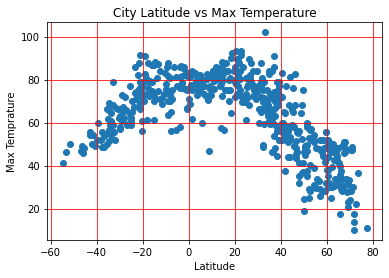

In [28]:
# PLOT DATA FROM ABOVE REFER TO CLASS WORK WEEK 6 COPY THIS EXAMPLE FOR OTHER PLOTS BELOW TO MAKE EASIER

plt.figure(facecolor=(1, 1, 1))
fig = plt.figure()
fig.patch.set_facecolor
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"] )
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max Temprature")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="red")

## Latitude vs. Humidity Plot

<Figure size 432x288 with 0 Axes>

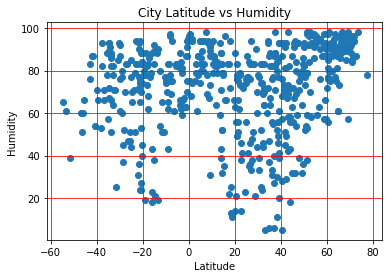

In [29]:
# PLOT DATA FROM ABOVE REFER TO CLASS WORK WEEK 6 COPY THIS EXAMPLE FOR OTHER PLOTS BELOW TO MAKE EASIER

plt.figure(facecolor=(1, 1, 1))
fig = plt.figure()
fig.patch.set_facecolor
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"] )
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="red")

## Latitude vs. Cloudiness Plot

<Figure size 432x288 with 0 Axes>

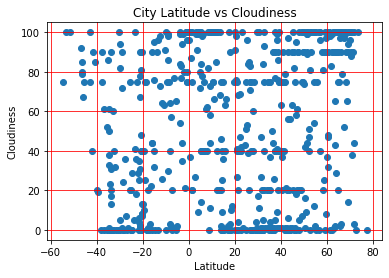

In [27]:
# PLOT DATA FROM ABOVE REFER TO CLASS WORK WEEK 6 COPY THIS EXAMPLE FOR OTHER PLOTS BELOW TO MAKE EASIER

plt.figure(facecolor=(1, 1, 1))
fig = plt.figure()
fig.patch.set_facecolor
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"] )
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="red")

## Latitude vs. Wind Speed Plot

<Figure size 432x288 with 0 Axes>

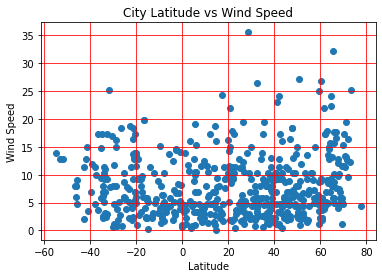

In [31]:
# PLOT DATA FROM ABOVE REFER TO CLASS WORK WEEK 6 COPY THIS EXAMPLE FOR OTHER PLOTS BELOW TO MAKE EASIER

plt.figure(facecolor=(1, 1, 1))
fig = plt.figure()
fig.patch.set_facecolor
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"] )
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="red")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression